# Preprocessing the raw Four Subject Text Document Data

In [1]:
import os

four_subject_dir='D:\\TensorFlow Programs\\Text Classification Programs and Datasets\\4-subject-data-text-classification\\train_data_final'

labels = []
texts = []

for label_type in ['accounts','biology','geography','physics']:
    dir_name=os.path.join(four_subject_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]=='.txt':
            f=open(os.path.join(dir_name,fname),encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type=='accounts':
                labels.append(0)
            elif label_type=='biology':
                labels.append(1)
            elif label_type=='geography':
                labels.append(2)
            elif label_type=='physics':
                labels.append(3)

# Tokenizing the Data

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

maxlen=400
training_samples=1500
validation_samples=len(texts)-training_samples
max_words=26000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
word_index=tokenizer.word_index
print('Found %s unique tokens'%len(word_index))

data=pad_sequences(sequences, maxlen=maxlen)

labels=np.asarray(labels)
labels=to_categorical(labels,num_classes=5)
print(labels.shape)
print('Shape of data tensor:',data.shape)
print('Shape of label tensor:',labels.shape)

indices=np.arange(data.shape[0])
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]
      
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+validation_samples]
y_val=labels[training_samples:training_samples+validation_samples]

Using TensorFlow backend.


Found 28512 unique tokens
(1786, 5)
Shape of data tensor: (1786, 400)
Shape of label tensor: (1786, 5)


# Model Definition

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint

embedding_dim=100
model=Sequential()
model.add(Embedding(max_words,embedding_dim))
model.add(LSTM(128))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()
filepath="Four_Subject_Text_Document_Classification_using_Recurrent_Neural_Network_1st Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         2600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 2,717,893
Trainable params: 2,717,893
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [5]:
history=model.fit(x_train,y_train, epochs=50, callbacks=callbacks_list, batch_size=32, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1500 samples, validate on 286 samples
Epoch 1/50
1500/1500 [==============================] - 30s 20ms/step - loss: 1.5851 - categorical_accuracy: 0.4640 - val_loss: 1.5468 - val_categorical_accuracy: 0.4406
Epoch 2/50
1500/1500 [==============================] - 28s 18ms/step - loss: 1.3669 - categorical_accuracy: 0.4307 - val_loss: 1.1716 - val_categorical_accuracy: 0.4301
Epoch 3/50
1500/1500 [==============================] - 28s 19ms/step - loss: 1.0932 - categorical_accuracy: 0.4307 - val_loss: 1.0822 - val_categorical_accuracy: 0.4441
Epoch 4/50
1500/1500 [==============================] - 28s 18ms/step - loss: 0.9461 - categorical_accuracy: 0.4773 - val_loss: 0.8644 - val_categorical_accuracy: 0.5245
Epoch 5/50
1500/1500 [==============================] - 27s 18ms/step - loss: 0.8435 - categorical_accuracy: 0.6307 - val_loss: 0.8036 - val_categorical_accuracy: 0.8497
Epoch 6/50
1500/1500 [==============================] -

1500/1500 [==============================] - 26s 17ms/step - loss: 0.0803 - categorical_accuracy: 0.9647 - val_loss: 0.1770 - val_categorical_accuracy: 0.9441
Epoch 48/50
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0804 - categorical_accuracy: 0.9673 - val_loss: 0.1931 - val_categorical_accuracy: 0.9301
Epoch 49/50
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0789 - categorical_accuracy: 0.9680 - val_loss: 0.1720 - val_categorical_accuracy: 0.9406
Epoch 50/50
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0738 - categorical_accuracy: 0.9700 - val_loss: 0.1788 - val_categorical_accuracy: 0.9406


# Plotting the Training Process

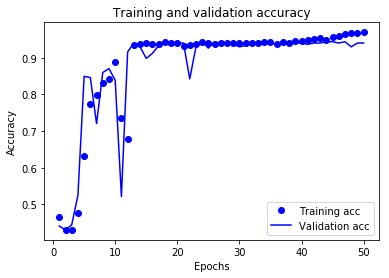

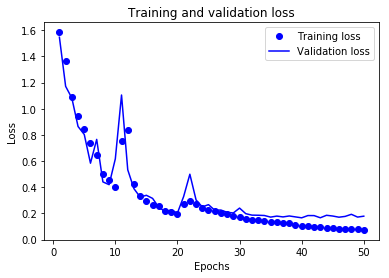

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Best Model Performance Evaluation

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('Four_Subject_Text_Document_Classification_using_Recurrent_Neural_Network_1st Experiment.h5')

In [8]:
from tensorflow.python.keras.models import load_model

batch_size=32
steps_test=int(len(x_val)/batch_size)
result = best_model.evaluate(x_val, y_val, steps=steps_test,verbose=1)
print("Validation-set accuracy: {0:.2%}".format(result[1]))

8/8 [==============================] - 1s 147ms/step - loss: 0.1663 - categorical_accuracy: 0.9406
Validation-set accuracy: 94.06%


# Confusion Matrix

In [9]:
# Get predictions
preds = best_model.predict(x_val, batch_size=16,verbose=1)
preds=np.around(preds)

orig_val_labels=np.argmax(y_val,axis=1)
predicted_labels=np.argmax(preds,axis=1)

orig_val_labels=np.reshape(orig_val_labels,(286,1))
predicted_labels=np.reshape(predicted_labels,(286,1))

print(predicted_labels.shape)
print(orig_val_labels.shape)

286/286 [==============================] - 2s 8ms/sample
(286, 1)
(286, 1)


<Figure size 432x288 with 0 Axes>

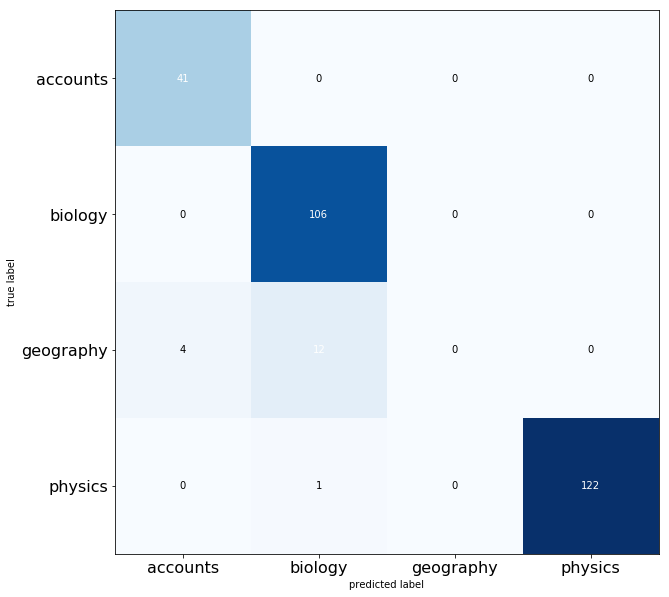

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_val_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(15,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['accounts','biology','geography','physics'], fontsize=16)
plt.yticks(range(4), ['accounts','biology','geography','physics'], fontsize=16)
plt.show()